In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import palette, models_order, assignments_order

In [5]:
df = pd.read_csv('../results/simulated_data_x_results_auc.csv')
df

,Unnamed: 0,auc,prauc,model,assignment,alpha,iteration
0,0,0.866572,0.432887,BiAA,soft,0,0
1,1,0.866918,0.425188,SBM,soft,0,0
2,2,0.877100,0.428136,DBiAA,soft,0,0
3,3,0.873370,0.422376,DSBM,soft,0,0
4,4,0.866409,0.429731,BiAA,hard,0,0
5,5,0.866409,0.429731,SBM,hard,0,0
6,6,0.872633,0.437669,DBiAA,hard,0,0
7,7,0.873457,0.433272,DSBM,hard,0,0


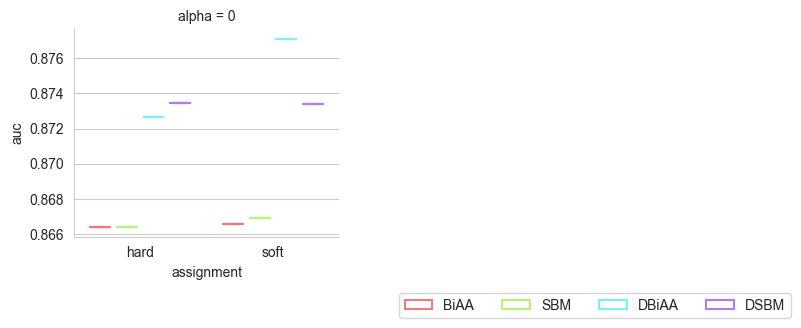

In [7]:
g = sns.FacetGrid(df, col="alpha", col_wrap=4, palette=palette, sharex=False)
g.map_dataframe(
    sns.boxplot,
    x='assignment',
    order=assignments_order,
    y='auc',
    hue='model',
    hue_order=models_order,
    palette=palette,
    dodge=True,
    fill=False,
    gap=.25
)

# get the legend
handles, labels = g.axes.flatten()[-1].get_legend_handles_labels()

# plot the legend lower, center of the whole figure
g.fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(.5, -.1))

# save figure
# plt.savefig(f'figures/{dataset}_boxplot.pdf', dpi=300)

plt.show()

In [9]:
df = pd.read_csv(f'../results/simulated_data_x_results_loss.csv')
df = df.groupby(['alpha', 'model', 'assignment', 'step']).mean().reset_index()
df.head()

,alpha,model,assignment,step,Unnamed: 0,loss,iteration
0,0,BiAA,hard,0,400.0,6203.648926,0.0
1,0,BiAA,hard,20,401.0,5761.383789,0.0
2,0,BiAA,hard,40,402.0,5449.887207,0.0
3,0,BiAA,hard,60,403.0,5039.827637,0.0
4,0,BiAA,hard,80,404.0,4580.440430,0.0


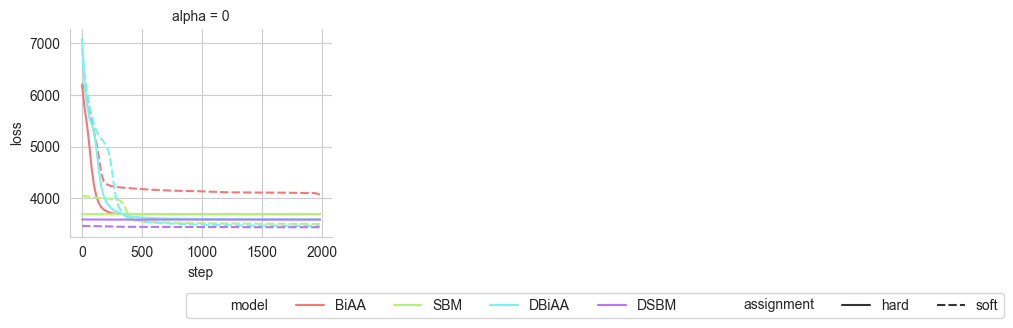

In [10]:
g = sns.FacetGrid(df, col="alpha", col_wrap=4, palette=palette, sharex=False)
g.map_dataframe(
        sns.lineplot,
            x='step',
            y='loss',
            hue='model',
            hue_order=models_order,
            style='assignment',
            palette=palette,
        )

# get the legend
handles, labels = g.axes.flatten()[-1].get_legend_handles_labels()

# plot the legend lower, center of the whole figure
g.fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(.5, -.1))

# save figure fig
# fig.savefig(f'figures/{dataset}_loss.pdf', dpi=300)

plt.show()